## Javier Mombiela
## Carnet: 20067

### Laboratorio #7

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
path = './malimg_paper_dataset_imgs/'

In [4]:
familias = ImageDataGenerator().flow_from_directory(directory=path, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [5]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [6]:
imgs, labels = next(familias)

In [7]:
imgs.shape

(9339, 64, 64, 3)

In [8]:
labels.shape

(9339, 25)

In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(familias.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

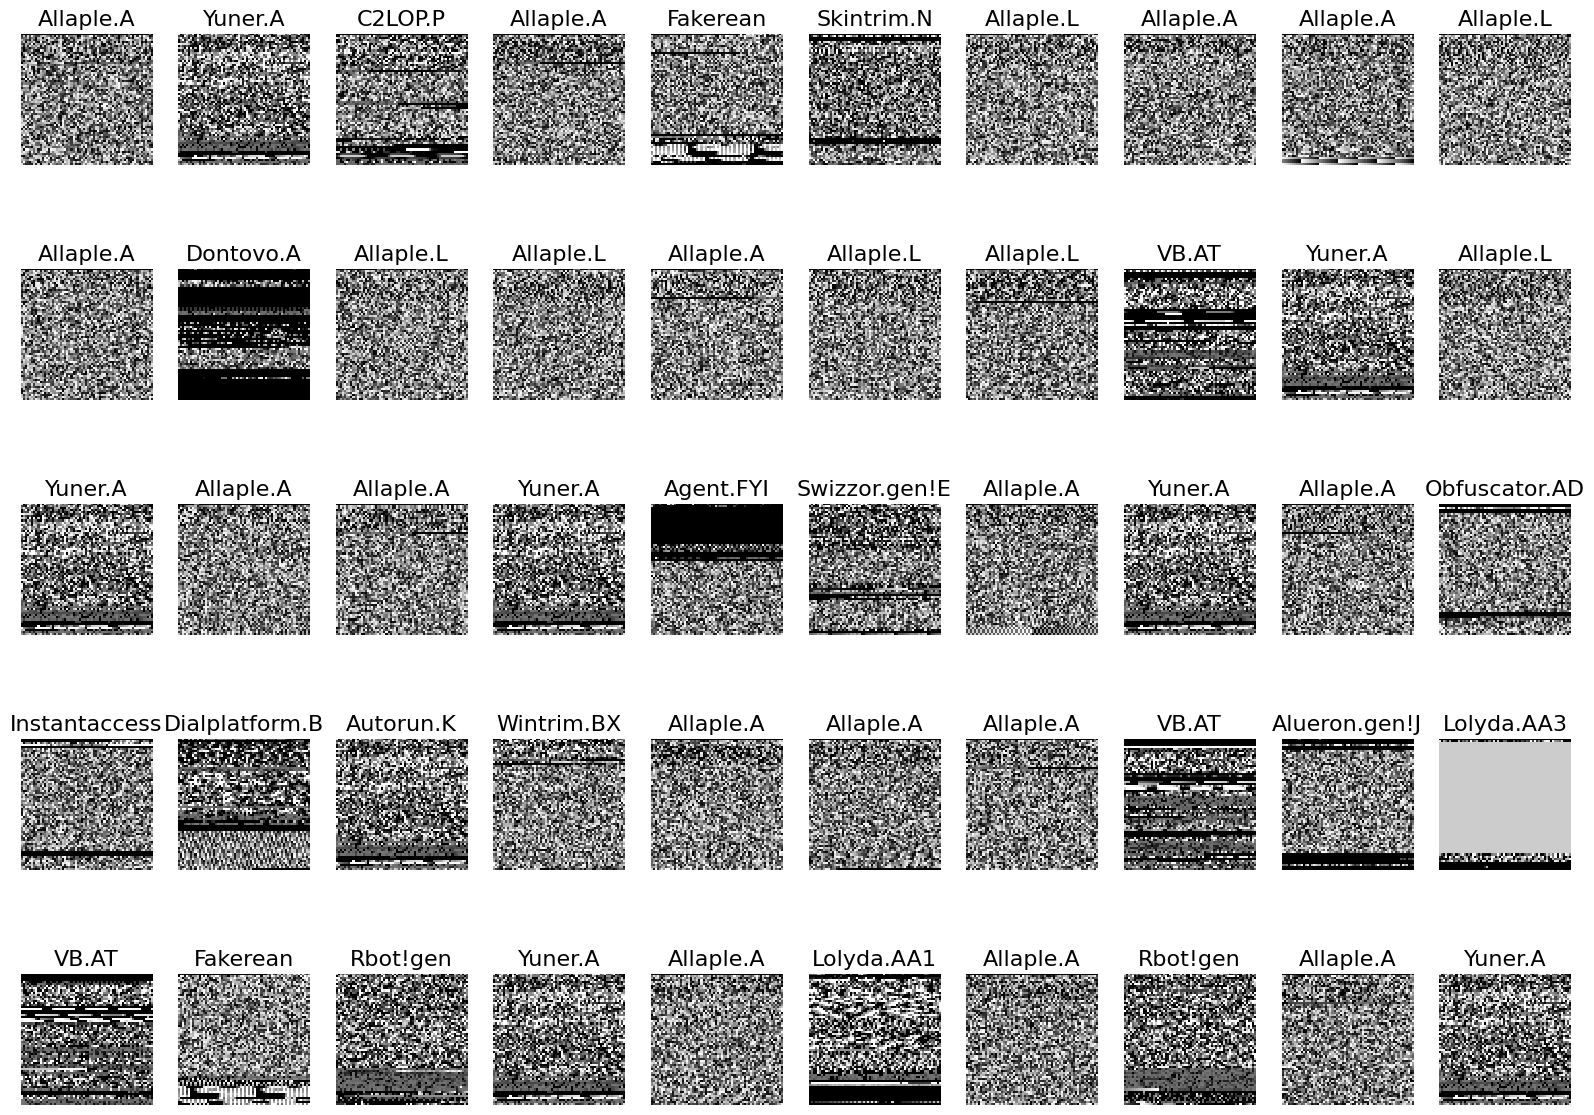

In [10]:
plots(imgs, titles = labels)

### Primera Parte

#### Preprocesamiento

In [11]:
# Conteo de observaciones por familia
counts = {}
for familia in os.listdir(path):
    if os.path.isdir(os.path.join(path, familia)):
        num_observaciones = len(os.listdir(os.path.join(path, familia)))
        counts[familia] = num_observaciones

# Imprimir el conteo de observaciones por familia
for familia, num_observaciones in counts.items():
    print(f"Familia: {familia}, Observaciones: {num_observaciones}")

Familia: Adialer.C, Observaciones: 122
Familia: Agent.FYI, Observaciones: 116
Familia: Allaple.A, Observaciones: 2949
Familia: Allaple.L, Observaciones: 1591
Familia: Alueron.gen!J, Observaciones: 198
Familia: Autorun.K, Observaciones: 106
Familia: C2LOP.gen!g, Observaciones: 200
Familia: C2LOP.P, Observaciones: 146
Familia: Dialplatform.B, Observaciones: 177
Familia: Dontovo.A, Observaciones: 162
Familia: Fakerean, Observaciones: 381
Familia: Instantaccess, Observaciones: 431
Familia: Lolyda.AA1, Observaciones: 213
Familia: Lolyda.AA2, Observaciones: 184
Familia: Lolyda.AA3, Observaciones: 123
Familia: Lolyda.AT, Observaciones: 159
Familia: Malex.gen!J, Observaciones: 136
Familia: Obfuscator.AD, Observaciones: 142
Familia: Rbot!gen, Observaciones: 158
Familia: Skintrim.N, Observaciones: 80
Familia: Swizzor.gen!E, Observaciones: 128
Familia: Swizzor.gen!I, Observaciones: 132
Familia: VB.AT, Observaciones: 408
Familia: Wintrim.BX, Observaciones: 97
Familia: Yuner.A, Observaciones: 800


In [12]:
# Decidir el número mínimo de observaciones requeridas
min_obs = 100

# Filtrar las clases con pocas observaciones
familias_filtradas = [familia for familia, num_observaciones in counts.items() if num_observaciones >= min_obs]

# Imprimir las clases filtradas
print("\nFamilias con suficientes observaciones:")
for cls in familias_filtradas:
    print(cls)


Familias con suficientes observaciones:
Adialer.C
Agent.FYI
Allaple.A
Allaple.L
Alueron.gen!J
Autorun.K
C2LOP.gen!g
C2LOP.P
Dialplatform.B
Dontovo.A
Fakerean
Instantaccess
Lolyda.AA1
Lolyda.AA2
Lolyda.AA3
Lolyda.AT
Malex.gen!J
Obfuscator.AD
Rbot!gen
Swizzor.gen!E
Swizzor.gen!I
VB.AT
Yuner.A


In [13]:
nombres_clases_generador = list(familias.class_indices.keys())

# Obtener los índices de las imágenes correspondientes a las familias filtradas
indices_familias_filtradas = [np.where(np.argmax(labels, axis=1) == nombres_clases_generador.index(familia))[0] for familia in familias_filtradas]
indices_familias_filtradas = np.concatenate(indices_familias_filtradas, axis=0)

# Filtrar las imágenes y etiquetas
imgs_filtradas = imgs[indices_familias_filtradas]
labels_filtradas = labels[indices_familias_filtradas]

#### Division de datos

In [14]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(imgs_filtradas, labels_filtradas, test_size=0.3, random_state=42)

print("Dimensiones del conjunto de entrenamiento:")
print("Imágenes:", X_train.shape)
print("Etiquetas:", y_train.shape)

print("\nDimensiones del conjunto de prueba:")
print("Imágenes:", X_test.shape)
print("Etiquetas:", y_test.shape)

Dimensiones del conjunto de entrenamiento:
Imágenes: (6413, 64, 64, 3)
Etiquetas: (6413, 25)

Dimensiones del conjunto de prueba:
Imágenes: (2749, 64, 64, 3)
Etiquetas: (2749, 25)


#### Modelo

In [15]:
def create_victim_model(input_shape):
    model = Sequential([
        Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=input_shape),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=64, kernel_size=3, activation="relu"),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(units=128, activation="relu"),
        Dense(units=25, activation="softmax")  # 25 clases de malware
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [16]:
input_shape = (64, 64, 3)

# Crear el modelo
victim_model = create_victim_model(input_shape)

# Entrenar el modelo
history = victim_model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/10


c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.4827 - loss: 49.8304 - val_accuracy: 0.7942 - val_loss: 0.7265
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.8399 - loss: 0.5787 - val_accuracy: 0.8363 - val_loss: 0.6064
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9066 - loss: 0.3026 - val_accuracy: 0.8581 - val_loss: 0.5549
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9474 - loss: 0.1833 - val_accuracy: 0.8597 - val_loss: 0.5195
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9509 - loss: 0.1578 - val_accuracy: 0.8888 - val_loss: 0.6390
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9458 - loss: 0.2472 - val_accuracy: 0.8794 - val_loss: 0.4990
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9513 - loss: 0.1620 - val_accuracy: 0.8799 - val_loss: 0.5344
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9636 - loss: 0.1545 - val_accuracy: 0.88

In [17]:
test_loss, test_acc = victim_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9107 - loss: 0.5203
Test accuracy: 0.9076027870178223


In [18]:
# Guardar el modelo
victim_model.save("modelo_victima.h5")

### Segunda Parte


In [26]:
import tensorflow as tf
from art.attacks.extraction import CopycatCNN
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier

#### Ataque de Evasion

El ataque de Gradiente Rápido (Fast Gradient Sign Method, FGSM) es una técnica de adversarial machine learning utilizada para generar imágenes adversarias de manera eficiente. La idea básica detrás del ataque FGSM es modificar ligeramente los píxeles de una imagen de entrada de manera que el modelo de clasificación cometa un error en su predicción, mientras que para un observador humano la imagen sigue siendo indistinguible de la original.

El proceso de generación de imágenes adversarias con FGSM es relativamente simple pero efectivo. Primero, se calcula el gradiente de la función de pérdida del modelo con respecto a los píxeles de la imagen de entrada. Luego, se modifica la imagen de entrada agregando un pequeño paso en la dirección del gradiente, multiplicado por un factor llamado epsilon (ε), que determina la magnitud del cambio realizado en los píxeles. En este caso, el valor de epsilon se establece en 2.1, lo que controla la magnitud de la perturbación aplicada a la imagen original. El signo del gradiente se utiliza para determinar si se debe aumentar o disminuir el valor de cada píxel para maximizar la pérdida del modelo.

En el código proporcionado, el valor de epsilon se establece en 2.1:
```python
attack_fgsm = FastGradientMethod(estimator=clasificador, eps=2.1)
```
Un valor más alto de epsilon resultará en una perturbación más grande en la imagen adversaria, lo que puede llevar a cambios más significativos en la clasificación del modelo. Sin embargo, un epsilon demasiado grande puede hacer que la imagen adversaria sea demasiado perceptible para un observador humano.

Es importante destacar que al evaluar el modelo original en imágenes adversarias generadas por FGSM, el accuracy original, que fue del 91%, disminuyó significativamente a un 54%. Esto ilustra el impacto del ataque en la capacidad del modelo para realizar predicciones precisas cuando se enfrenta a imágenes adversarias.

In [20]:
# Cargar el modelo víctima
vulnerable_model = tf.keras.models.load_model("modelo_victima.h5")

# Crear el clasificador ART
clasificador = TensorFlowV2Classifier(
    model=vulnerable_model, 
    nb_classes=25, 
    input_shape=(64, 64, 3), 
    loss_object=tf.keras.losses.CategoricalCrossentropy()
)

# Configurar el ataque de gradiente rápido
attack_fgsm = FastGradientMethod(estimator=clasificador, eps=2.1)

# Generar imágenes adversarias
test_images_adv = attack_fgsm.generate(x=X_test)

In [21]:
# Evaluar el modelo en imágenes limpias
score_clean = vulnerable_model.evaluate(x=X_test, y=y_test)

# Evaluar el modelo en imágenes adversarias
score_adv = vulnerable_model.evaluate(x=test_images_adv, y=y_test)

# Comparar pérdidas en el conjunto de prueba
print(f"Clean test set loss: {score_clean[0]:.2f} vs adversarial test set loss: {score_adv[0]:.2f}")

# Comparar precisión en el conjunto de prueba
print(f"Clean test set accuracy: {score_clean[1]:.2f} vs adversarial test set accuracy: {score_adv[1]:.2f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9107 - loss: 0.5203
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5563 - loss: 4.0190
Clean test set loss: 0.59 vs adversarial test set loss: 4.11
Clean test set accuracy: 0.91 vs adversarial test set accuracy: 0.54


#### Ataque de Extraccion

El ataque de extracción CopycatCNN es una técnica de adversarial machine learning que tiene como objetivo robar el conocimiento de un modelo de clasificación existente, también conocido como modelo víctima. En este caso, la implementación utiliza una red neuronal convolucional (CNN) para llevar a cabo el ataque.

En primer lugar, se selecciona un modelo de clasificación existente que se desea atacar. Este modelo se conoce como el modelo víctima y puede tener arquitectura CNN u otro tipo de modelo. Luego, se crea un nuevo modelo de clasificación, denominado modelo en blanco o modelo ladrón, que tiene una arquitectura similar pero con parámetros inicializados al azar. Este modelo se utilizará para robar el conocimiento del modelo víctima.

Se configura el ataque de extracción CopycatCNN con los parámetros adecuados, como el tamaño del lote de consultas (batch size), el número de épocas de entrenamiento, y el número máximo de muestras robadas. Utilizando el modelo en blanco como base, el ataque CopycatCNN realiza una serie de consultas al modelo víctima con ejemplos de datos de entrada. Luego, utiliza las respuestas del modelo víctima para entrenar el modelo en blanco, ajustando sus parámetros para que se comporte de manera similar al modelo víctima.

Una vez completada la extracción, el modelo en blanco se convierte en el modelo robado. Este modelo se puede evaluar utilizando un conjunto de datos de prueba para medir su precisión y compararlo con el modelo víctima original. En este caso, el modelo víctima tiene una precisión del 91%, mientras que el modelo robado alcanza una precisión del 83%. Esto resalta la efectividad del ataque CopycatCNN en la extracción del conocimiento del modelo víctima, aunque con una pérdida de precisión en el modelo robado.

In [77]:
# Crear el ataque de extracción CopycatCNN
attack_copycat = CopycatCNN(
    classifier=clasificador, # Clasificador de la víctima definido anteriormente
    batch_size_query=1,
    nb_epochs=10,
    nb_stolen=1000
)

In [78]:
#Definimos un nuevo modelo
def create_blank_model():
    # Defining the model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(25, activation='softmax')
    ])

    # Compiling the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Returning the model
    return model

In [79]:
# Crear el modelo robado
stolen_model = TensorFlowV2Classifier(
    model=create_blank_model(),
    nb_classes=25,
    input_shape=(64, 64, 3),
    loss_object=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam() 
)

# Extraer el modelo robado
stolen_classifier = attack_copycat.extract(
    x=X_test, 
    y=None, 
    thieved_classifier=stolen_model
)

c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Evaluar el modelo original en el conjunto de prueba
score_original = clasificador._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Evaluar el modelo robado en el conjunto de prueba
score_stolen = stolen_classifier._model.evaluate(
    x=X_test, 
    y=y_test
    )

# Comparar pérdidas en el conjunto de prueba
print(f"Original test loss: {score_original[0]:.2f} " 
      f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparar precisión en el conjunto de prueba
print(f"Original test accuracy: {score_original[1]:.2f} " 
      f"vs stolen test accuracy: {score_stolen[1]:.2f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9107 - loss: 0.5203
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8249 - loss: 4.6309
Original test loss: 0.59 vs stolen test loss: 4.79
Original test accuracy: 0.91 vs stolen test accuracy: 0.83
